In [1]:
# Importing required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Loading the data
# path of data 
path = 'https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/automobileEDA.csv'
df = pd.read_csv(path)
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


Simple Linear Regression

In [3]:
# impoting library
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [4]:
X = df[['highway-mpg']]
Y = df['price']

In [5]:
# fitting
lm.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [6]:
# prediction
Yhat=lm.predict(X)
Yhat[0:5] 

array([16236.50464347, 16236.50464347, 17058.23802179, 13771.3045085 ,
       20345.17153508])

In [7]:
# value of intercspt
lm.intercept_

38423.305858157386

In [8]:
# value of slope
lm.coef_

array([-821.73337832])

In [9]:
# creating model using 'engine-size'
lm1 = LinearRegression()

# fitting
lm1.fit(df[['engine-size']], df[['price']])

#slope
print(lm1.coef_)
#intercept
print(lm1.intercept_)

[[166.86001569]]
[-7963.33890628]


Multiple Linear Regression

In [10]:
# Developing model using multiple predictors
Z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]

In [11]:
# fitting
lm.fit(Z, df['price'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [12]:
# intercept
lm.intercept_

-15806.624626329198

In [13]:
# coefficients
lm.coef_

array([53.49574423,  4.70770099, 81.53026382, 36.05748882])

In [14]:
# Another model
lm2 = LinearRegression()
lm2.fit(df[['normalized-losses', 'highway-mpg']], df['price'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [15]:
# intercept
lm2.intercept_

38201.31327245728

In [16]:
# Coefficient
lm2.coef_

array([   1.49789586, -820.45434016])

Model Evaluation using Visualisation

In [17]:
# import the visualization package: seaborn
import seaborn as sns
%matplotlib inline 

(0, 48177.51382813506)

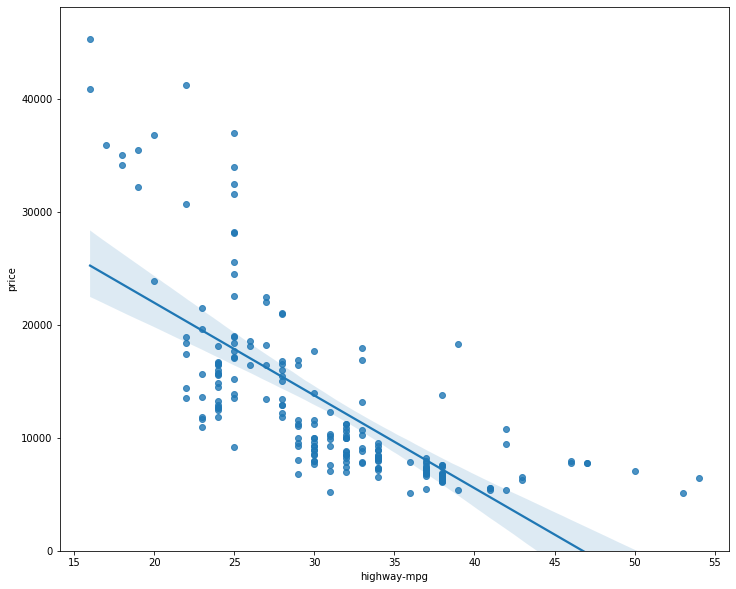

In [18]:
# Let's visualize Horsepower as potential predictor variable of price:

width = 12
height = 10
plt.figure(figsize=(width, height))
sns.regplot(x="highway-mpg", y="price", data=df)
plt.ylim(0,)

(0, 47414.10667770421)

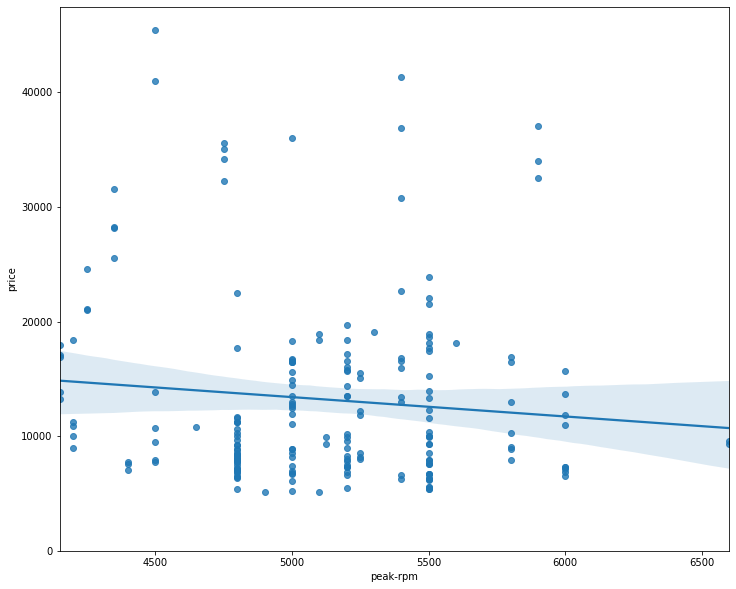

In [19]:
# Let's compare this plot to the regression plot of "peak-rpm"

plt.figure(figsize=(width, height))
sns.regplot(x="peak-rpm", y="price", data=df)
plt.ylim(0,)

In [20]:
# correlation
df[["peak-rpm","highway-mpg","price"]].corr()

,peak-rpm,highway-mpg,price
peak-rpm,1.000000,-0.058598,-0.101616
highway-mpg,-0.058598,1.000000,-0.704692
price,-0.101616,-0.704692,1.000000


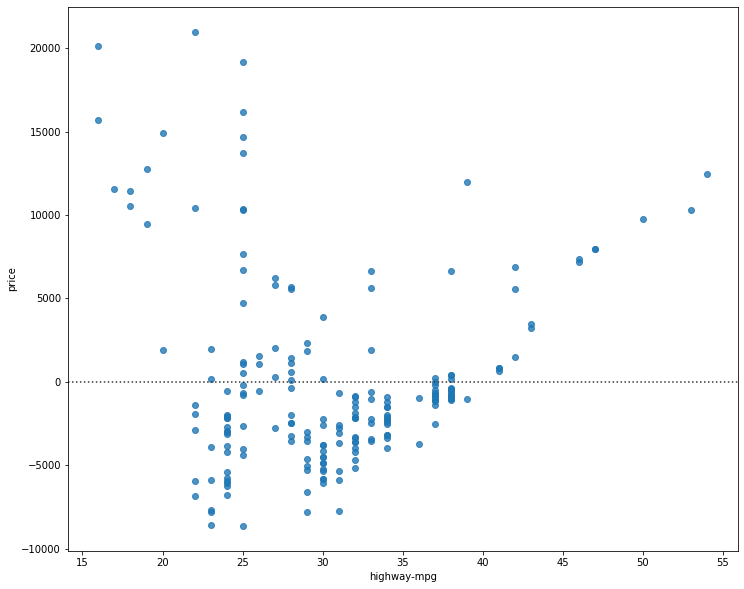

In [21]:
# Residual plot

width = 12
height = 10
plt.figure(figsize=(width, height))
sns.residplot(df['highway-mpg'], df['price'])
plt.show()

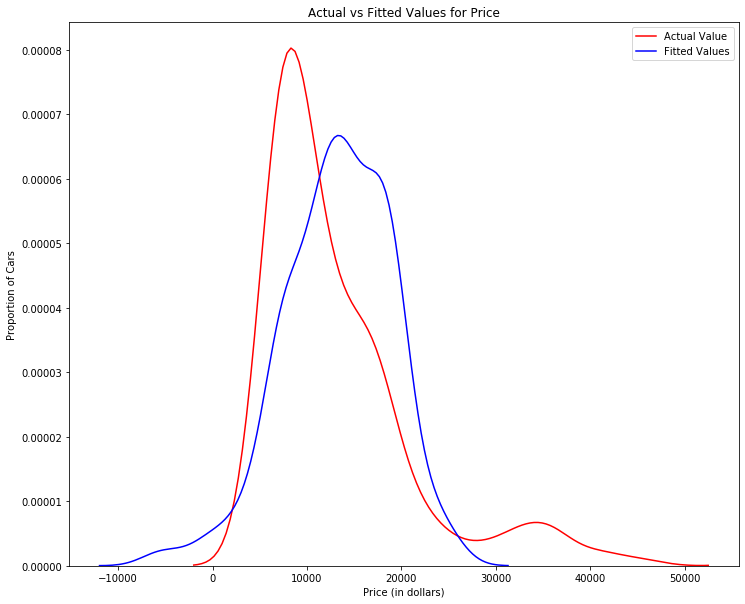

In [22]:
# Visualisation of multiple linear regression

Y_hat = lm.predict(Z)

plt.figure(figsize=(width, height))


ax1 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
sns.distplot(Yhat, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

Polynomial Regression and Pipelines

In [23]:
#try fitting a polynomial model to the data instead
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(15, 55, 100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for Price ~ Length')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of Cars')

    plt.show()
    plt.close()

In [24]:
# lets get the variables
x = df['highway-mpg']
y = df['price']

In [25]:
# Let's fit the polynomial using the function polyfit
# Here we use a polynomial of the 3rd order (cubic) 
f = np.polyfit(x, y, 3)
p = np.poly1d(f)
print(p)

        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


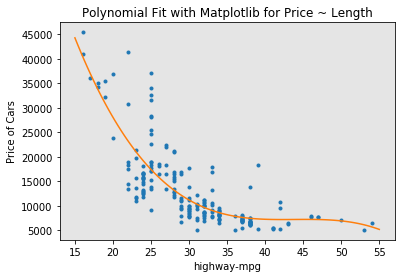

In [26]:
# Let's plot the function
PlotPolly(p, x, y, 'highway-mpg')

In [27]:
np.polyfit(x, y, 3)

array([-1.55663829e+00,  2.04754306e+02, -8.96543312e+03,  1.37923594e+05])

            11             10             9           8         7
-1.243e-08 x  + 4.722e-06 x  - 0.0008028 x + 0.08056 x - 5.297 x
          6        5             4             3             2
 + 239.5 x - 7588 x + 1.684e+05 x - 2.565e+06 x + 2.551e+07 x - 1.491e+08 x + 3.879e+08


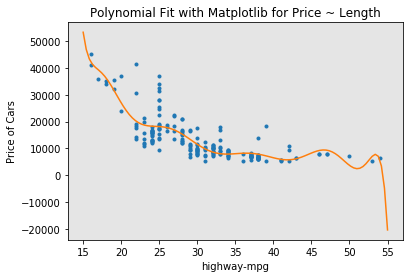

In [28]:
# Here we use a polynomial of the 11th order (cubic) 
f = np.polyfit(x, y, 11)
p = np.poly1d(f)
print(p)
PlotPolly(p, x, y, 'highway-mpg')

In [29]:
# We can perform a polynomial transform on multiple features

from sklearn.preprocessing import PolynomialFeatures

In [30]:
#create a PolynomialFeatures object of degree 2:

pr=PolynomialFeatures(degree=2)
pr

PolynomialFeatures(degree=2, include_bias=True, interaction_only=False,
                   order='C')

In [32]:
Z_pr=pr.fit_transform(Z)

In [33]:
# The original data
Z.shape

(201, 4)

In [34]:
# after transformation
Z_pr.shape

(201, 15)

Pipeline

In [35]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [36]:
# We create the pipeline, by creating a list of tuples including the name of the model or
# estimator and its corresponding constructor

Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model',LinearRegression())]

In [37]:
#we input the list as an argument to the pipeline constructor

pipe=Pipeline(Input)
pipe

Pipeline(memory=None,
         steps=[('scale',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('polynomial',
                 PolynomialFeatures(degree=2, include_bias=False,
                                    interaction_only=False, order='C')),
                ('model',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [38]:
# fitting
pipe.fit(Z,y)

Pipeline(memory=None,
         steps=[('scale',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('polynomial',
                 PolynomialFeatures(degree=2, include_bias=False,
                                    interaction_only=False, order='C')),
                ('model',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [39]:
# predicting
ypipe=pipe.predict(Z)
ypipe[0:4]

array([13102.74784201, 13102.74784201, 18225.54572197, 10390.29636555])

Measures for In-Sample Evaluation

Model 1: Simple Linear Regression

In [40]:
# Let's calculate the R^2

#highway_mpg_fit
lm.fit(X, Y)

# Find the R^2
print('The R-square is: ', lm.score(X, Y))

The R-square is:  0.4965911884339175


In [41]:
# Let's calculate the MSE

Yhat=lm.predict(X)
print('The output of the first four predicted value is: ', Yhat[0:4])

The output of the first four predicted value is:  [16236.50464347 16236.50464347 17058.23802179 13771.3045085 ]


In [42]:
from sklearn.metrics import mean_squared_error

In [43]:
# compare the predicted results with the actual results

mse = mean_squared_error(df['price'], Yhat)
print('The mean square error of price and predicted value is: ', mse)

The mean square error of price and predicted value is:  31635042.944639895


Model 2: Multiple Linear Regression

In [44]:
# Let's calculate the R^2

#highway_mpg_fit
lm.fit(Z, df['price'])

# Find the R^2
print('The R-square is: ', lm.score(Z, df['price']))

The R-square is:  0.8093562806577457


In [45]:
# Let's calculate the MSE

Y_predict_multifit = lm.predict(Z)

In [46]:
# compare the predicted results with the actual results

print('The mean square error of price and predicted value using multifit is: ', \
        mean_squared_error(df['price'], Y_predict_multifit))

The mean square error of price and predicted value using multifit is:  11980366.87072649


Model 3: Polynomial Fit

In [47]:
from sklearn.metrics import r2_score

# apply the function to get the value of r^2
r_squared = r2_score(y, p(x))
print('The R-square value is: ', r_squared)

The R-square value is:  0.702376908737018


In [48]:
# MSE
mean_squared_error(df['price'], p(x))

18703127.67098826

Prediction and Decision Making

In [49]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline 

In [50]:
# Create a new input
new_input=np.arange(1, 100, 1).reshape(-1, 1)

In [51]:
# Fit the model

lm.fit(X, Y)
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [52]:
# Produce a prediction

yhat=lm.predict(new_input)
yhat[0:5]

array([37601.57247984, 36779.83910151, 35958.10572319, 35136.37234487,
       34314.63896655])

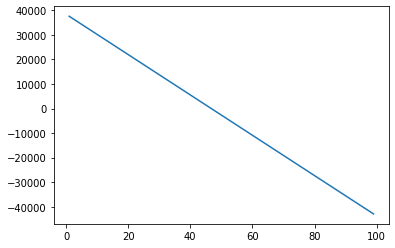

In [53]:
#plot the data
plt.plot(new_input, yhat)
plt.show()